<a href="https://colab.research.google.com/github/HarshithKulkarni/Convolutional-Neural-Networks/blob/master/7_Sem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HAND WRITTEN DIGIT RECOGNITION***

In [ ]:
#@title Initialize session
from google.colab import files
import os
if('final_model.h5' not in os.listdir()):

  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

  !pip install gTTS
  !pip install pydub

Saving final_model.h5 to final_model.h5
User uploaded file "final_model.h5" with length 1320336 bytes
  Created wheel for gtts-token: filename=gTTS_token-1.1.4-cp36-none-any.whl size=4250 sha256=65a54efc214b03a124f39a8b692ba5f66a25f9ba687ee741393430d64245364e
  Stored in directory: /root/.cache/pip/wheels/a8/64/73/49f151671831c7cda8259b7d4454bc1b4260c4a1d81bad1b83
Successfully built gtts-token


In [ ]:
#@title  { vertical-output: true, display-mode: "form" }
#@markdown Draw
# Draw canvas

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.strokeStyle = '#FFFFFF';
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=10):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
print("\t\t\t\t\t")
draw()

4741

In [ ]:
#@title Model Architecture
from keras.models import load_model
model = load_model("final_model.h5")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

[8.9029930e-07 6.6358014e-03 1.9001521e-04 4.3373322e-01 1.0027599e-06
 5.4418033e-01 1.2093091e-04 9.9164564e-03 5.0029480e-03 2.1832428e-04]


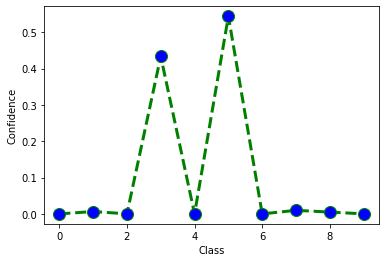

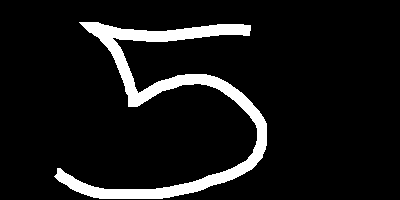


I think you have drawn 5


In [ ]:
#@title  { display-mode: "form" }
#@markdown Predict
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
from google.colab.patches import cv2_imshow
from termcolor import colored
import cv2
from gtts import gTTS
from IPython.display import Audio
from scipy.io import wavfile
from pydub import AudioSegment
from matplotlib import pyplot as  plt
# load and prepare the image
def load_image(filename):
	# load the image
	img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
	img = cv2.resize(img,(28,28),interpolation=cv2.INTER_LINEAR)
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img


# load an image and predict the class
def run_example():
	
	# load the image
	img = load_image('drawing.png')
	# plot_img = img.reshape((28,28,1)

	# load model
	model = load_model("final_model.h5")
	
	# predict the class
	digit = model.predict_classes(img)
	digits = model.predict(img)
	digits = digits.reshape(10,)
	print(digits)
	plt.plot(digits,color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
	plt.xlabel("Class")
	plt.ylabel("Confidence")
	plt.show()
	mytext = "I think you have drawn " + str(digit[0])

	return mytext

# entry point, run the example
mytext = run_example()
img = cv2.imread('drawing.png')
cv2_imshow(img)
print()
print(colored(mytext, 'green', attrs=['bold']))
language = 'en' 
myobj = gTTS(text=mytext, lang=language, slow=False)
myobj.save("welcome.mp3") 
sound = AudioSegment.from_mp3("welcome.mp3")
sound.export("welcome.wav", format="wav")
data = wavfile.read('welcome.wav')
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
Audio(sounddata,rate=framerate,autoplay=True)